# lets go

In [46]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import torch.optim as optim
import torch.nn as nn
import torch.utils.data as data_utils
import torchvision
import torch.nn.functional as F

In [33]:
train_data = torchvision.datasets.MNIST(
    "./data", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_data = torchvision.datasets.MNIST(
    "./data", train=True, transform=torchvision.transforms.ToTensor(), download=True
)

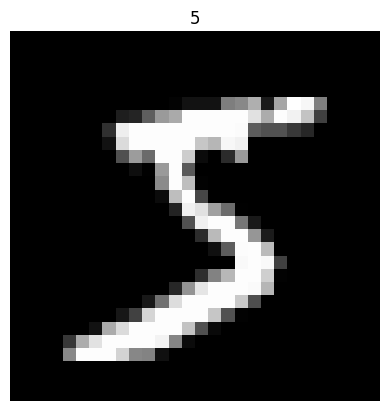

In [34]:
np_image = train_data[0][0].numpy()
np_image[0,:,:].shape
plt.imshow(np_image[0,:,:], cmap='gray')
plt.title(train_data[0][1])
plt.axis('off')
plt.show()

In [35]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
train_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [108]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(28*28, 150)
        self.layer2 = nn.Linear(150, 50)
        self.layer3 = nn.Linear(50, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        l1 = self.relu(self.layer1(x))
        l2 = self.relu(self.layer2(l1))
        return self.layer3(l2)


In [112]:
net = Net()
opt = optim.SGD(net.parameters(), 0.1)
loss_fn = nn.MSELoss()
losses = []
accuracies = [0.1]

In [116]:
for epoch in range(10):
    total_correct = 0
    total = len(train_data)
    for images, labels in train_loader:
        images_reshaped = images.reshape(-1, 28*28)
        hot_pred = net(images_reshaped)
        pred = hot_pred.argmax(axis=1)
        nb_correct = sum(pred == labels)
        total_correct += nb_correct
        hot_labels = F.one_hot(labels, 10).to(torch.float32)
        loss = loss_fn(hot_labels, hot_pred)
        loss.backward()
        losses.append(loss.item())
        opt.step()
        opt.zero_grad()
    acc = total_correct/total
    accuracies.append(acc.item())
    print(epoch, acc)

total_correct/total

0 tensor(0.9540)
1 tensor(0.9562)
2 tensor(0.9582)
3 tensor(0.9600)
4 tensor(0.9618)
5 tensor(0.9633)
6 tensor(0.9647)
7 tensor(0.9662)
8 tensor(0.9671)
9 tensor(0.9683)


tensor(0.9683)

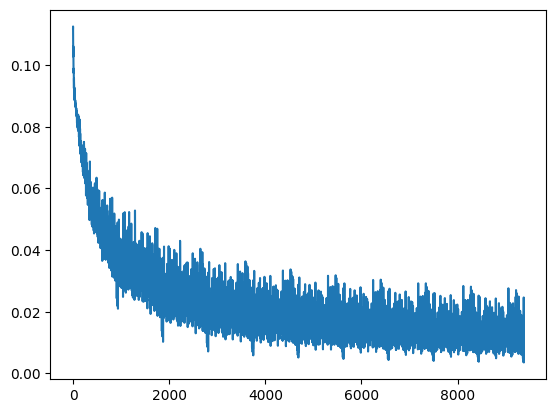

In [114]:
plt.plot(losses)

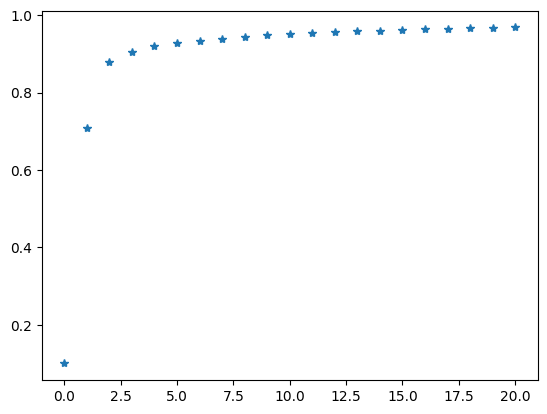

In [118]:
plt.plot(accuracies, '*')

In [123]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(28*28, 150)
        self.layer2 = nn.Linear(150, 10)
        # self.layer3 = nn.Linear(50, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        l = self.relu(self.layer1(x))
        return F.softmax(self.layer2(l), dim=1)

In [124]:
net = Net()
opt = optim.SGD(net.parameters(), 0.1)
loss_fn = nn.MSELoss()
losses = []
accuracies = [0.1]

In [131]:
for epoch in range(10):
    total_correct = 0
    total = len(train_data)
    for images, labels in train_loader:
        images_reshaped = images.reshape(-1, 28*28)
        hot_pred = net(images_reshaped)
        pred = hot_pred.argmax(axis=1)
        nb_correct = sum(pred == labels)
        total_correct += nb_correct
        hot_labels = F.one_hot(labels, 10).to(torch.float32)
        loss = loss_fn(hot_labels, hot_pred)
        loss.backward()
        losses.append(loss.item())
        opt.step()
        opt.zero_grad()
    acc = total_correct/total
    accuracies.append(acc.item())
    print(epoch, acc)

total_correct/total

0 tensor(0.8711)
1 tensor(0.8856)
2 tensor(0.8929)
3 tensor(0.8977)
4 tensor(0.9017)
5 tensor(0.9045)
6 tensor(0.9075)
7 tensor(0.9100)
8 tensor(0.9121)
9 tensor(0.9139)


tensor(0.9139)

In [132]:
a = np.array([6.0427e-02, 9.3072e-03, 3.4289e-02, 3.4166e-01, 9.8401e-03, 3.4012e-01,
         2.1497e-02, 4.8416e-02, 1.0055e-01, 3.3891e-02])

In [133]:
print(a > 0, sum(a))

[ True  True  True  True  True  True  True  True  True  True] 0.9999973000000001


# convolutional

In [140]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Conv2d(1, 8, 5)
        self.layer2 = nn.Linear(4608, 10)
        # self.layer3 = nn.Linear(50, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        l = self.relu(self.layer1(x))
        l = l.reshape(-1, 4608)
        return F.softmax(self.layer2(l), dim=1)

In [141]:
net = Net()
opt = optim.SGD(net.parameters(), 0.1)
loss_fn = nn.MSELoss()
losses = []
accuracies = [0.1]

In [142]:
for epoch in range(10):
    total_correct = 0
    total = len(train_data)
    for images, labels in train_loader:
        # images_reshaped = images.reshape(-1, 28*28)
        hot_pred = net(images)
        pred = hot_pred.argmax(axis=1)
        nb_correct = sum(pred == labels)
        total_correct += nb_correct
        hot_labels = F.one_hot(labels, 10).to(torch.float32)
        loss = loss_fn(hot_labels, hot_pred)
        loss.backward()
        losses.append(loss.item())
        opt.step()
        opt.zero_grad()
    acc = total_correct/total
    accuracies.append(acc.item())
    print(epoch, acc)

total_correct/total

0 tensor(0.7705)
1 tensor(0.9025)
2 tensor(0.9108)
3 tensor(0.9154)
4 tensor(0.9193)
5 tensor(0.9229)
6 tensor(0.9264)
7 tensor(0.9297)
8 tensor(0.9326)
9 tensor(0.9361)


tensor(0.9361)